# Linear Regression - Assignment 1

## - Samvram Sahu - SC15B132

Importing necessay packages

In [330]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

Reading data from provided files

In [331]:
dataFrame = pd.read_csv('ex1data1.txt', names=['Population','Profit'])
dataFrame = dataFrame.sort_values(by='Population')
dataFrame_2 = pd.read_csv('ex1data2.txt', names=['Size','Bedrooms','Profit'])

Normalizing the data if required and visualizing the dataset

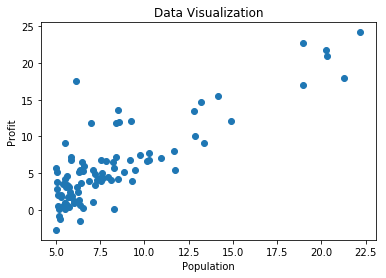

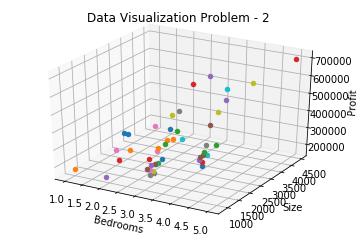

In [332]:
x = np.array(dataFrame['Population'])
y = np.array(dataFrame['Profit'])
x1 = np.array(dataFrame_2['Size'])
x2 = np.array(dataFrame_2['Bedrooms'])
y1 = np.array(dataFrame_2['Profit'])

plt.figure()
plt.title('Data Visualization')
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(0,len(x1)):
    ax.scatter(x2[i],x1[i],y1[i])    
plt.title('Data Visualization Problem - 2')
ax.set_ylabel('Size')
ax.set_xlabel('Bedrooms')
ax.set_zlabel('Profit')

x1 = (x1-np.mean(x1))/np.std(x1)
x2 = (x2-np.mean(x2))/np.std(x2)
y1 = y1/np.max(y1)

Defining cost functions for both problems, which take parameters as input

In [333]:
def cost(a,b):
    error = 0
    for i in range(0,len(x)):
        error = error + (y[i]-(a*x[i]+b))*(y[i]-(a*x[i]+b))
    rmse = (error*1.0/len(x))**(0.5)
    return rmse

In [334]:
def cost_2(a1, a2, b1):
    error = 0
    for i in range(0,len(x1)):
        error = error + (y1[i]-(a1*x1[i]+a2*x2[i]+b1))*(y1[i]-(a1*x1[i]+a2*x2[i]+b1))
    rmse = ((error*1.0)/len(x))**(0.5)
    return rmse

Plotting the cost function for problem 1

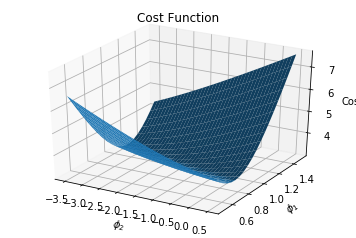

In [335]:
a = np.linspace(0.5,1.5,20)
b = np.linspace(-3.5,0.5,40)

X,Y = np.meshgrid(a,b)
z_p = np.array([cost(i,j) for i,j in zip(np.ravel(X),np.ravel(Y))])
Z = z_p.reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(Y,X,Z)
plt.title('Cost Function')
ax.set_xlabel('$\phi_2$')
ax.set_ylabel('$\phi_1$')
ax.set_zlabel('Cost')
plt.show()

A simple solution using sklearn library

In [336]:
model = linear_model.LinearRegression()
model.fit(x.reshape((-1,1)),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

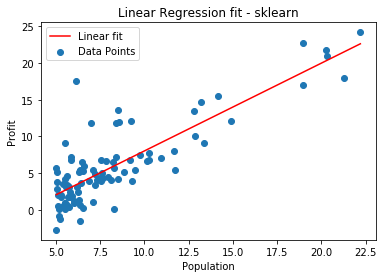

In [337]:
y_pred = model.predict(x.reshape((-1,1)))
plt.figure()
plt.title('Linear Regression fit - sklearn')
plt.scatter(x,y)
plt.plot(x.reshape((-1,1)),y_pred,'r')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(['Linear fit','Data Points'])
plt.show()

Update equations being trained for 1000 runs, using SGD

In [338]:
a_iter = 0
b_iter = 0

learning_rate = 0.001
step = 0.0001

for i in range(0,1000):
    a_deriv = (cost(a_iter+step,b_iter)-cost(a_iter,b_iter))/step
    b_deriv = (cost(a_iter,b_iter+step)-cost(a_iter,b_iter))/step
    a_iter = a_iter - learning_rate*(a_deriv)
    b_iter = b_iter - learning_rate*(b_deriv)
    
print('In the line of the form y=ax+b')
print('a = '+str(a_iter))
print('b = '+str(b_iter))

In the line of the form y=ax+b
a = 0.8134144441741853
b = -0.11749658066203761


In [339]:
a1_iter = 0
a2_iter = 0
b1_iter = 0

learning_rate = 0.001
step = 0.0001

for i in range(0,1000):
    a1_deriv = (cost_2(a1_iter+step,a2_iter,b1_iter)-cost_2(a1_iter,a2_iter,b1_iter))/step
    a2_deriv = (cost_2(a1_iter,a2_iter+step,b1_iter)-cost_2(a1_iter,a2_iter,b1_iter))/step
    b1_deriv = (cost_2(a1_iter,a2_iter,b1_iter+step)-cost_2(a1_iter,a2_iter,b1_iter))/step
    a1_iter = a1_iter - learning_rate*(a1_deriv)
    a2_iter = a2_iter - learning_rate*(a2_deriv)
    b1_iter = b1_iter - learning_rate*(b1_deriv)
    
print('In the line of the form y=a1x1+a2x2+b1')
print('a1 = '+str(a1_iter))
print('a2 = '+str(a2_iter))
print('b1 = '+str(b1_iter))

In the line of the form y=a1x1+a2x2+b1
a1 = 0.14263747643162253
a2 = 0.0040392344664842705
b1 = 0.47839186524089394


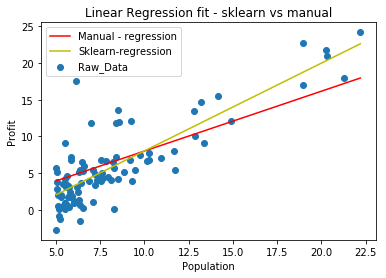

In [340]:
y_pred_manual = []
for i in range(0,len(x)):
    y_pred_manual.append(a_iter*x[i] + b_iter)

plt.figure()
plt.title('Linear Regression fit - sklearn vs manual')
plt.scatter(x,y)
plt.plot(x.reshape(-1,1), y_pred_manual,'r')
plt.plot(x.reshape(-1,1), y_pred,'y')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(['Manual - regression','Sklearn-regression','Raw_Data'])
plt.show()

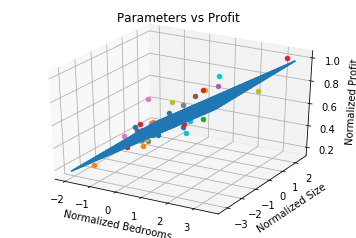

In [341]:
x1_rep = np.linspace(-2, 3.5, 55)
x2_rep = np.linspace(-3.2, 2.4, 56)

X2, X1 = np.meshgrid(x2_rep,x1_rep)
Y1_pred = np.array([a1_iter*j+a2_iter*i+b1_iter for i,j in zip(np.ravel(X2),np.ravel(X1))])
Y1pred = Y1_pred.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_wireframe(X1,X2,Y1pred)
for i in range(0,len(x1)):
    ax.scatter(x1[i],x2[i],y1[i])
plt.title('Parameters vs Profit')
ax.set_ylabel('Normalized Size')
ax.set_xlabel('Normalized Bedrooms')
ax.set_zlabel('Normalized Profit')
plt.show()